<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/fr/thumb/e/e5/Logo_%C3%A9cole_des_ponts_paristech.svg/676px-Logo_%C3%A9cole_des_ponts_paristech.svg.png" width="200"  height="200" hspace="200"/> </td>
<td> <img src="https://pbs.twimg.com/profile_images/1156541928193896448/5ihYIbCQ_200x200.png" width="200" height="200" /> </td>
</tr></table>

<br/>

<h1><center>Session 5 - Supervised modeling</center></h1>



<font size="3">This session is divided into **4** parts:
- **Data preparation**
- **Modeling**
- **Evaluation**
- **Bonus: Interpretability**

In each of these parts, some **guidelines** and **hints** are given for each task. 
Do not hesitate to check the links to documentation to understand the functions you use. 
    
The goal of this session is to **implement different supervised models** to predict box office sales.
</font>

# 0 - Requirements and imports

### Requirements

In [29]:
#!pip install lightgbm
#!pip install sklearn
#!pip install shap

     |████████████████████████████████| 1.0 MB 10.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


## Imports

In [ ]:
import pandas as pd
import numpy as np

# 1. Dataprep

## 1.1 Loading data

In [5]:
# Load the data from the CSV file: add the path to your file in the quotes ''
data = pd.read_csv('../session4/data_prepared_session4.csv', index_col=0)
data.head()

,year,title,sales,release_date,is_part_of_collection,budget,runtime,original_lang_en,original_lang_es,original_lang_fr,...,cos_month,nb_movie_collection,rolling_sales_collection,mean_3_popularity,mean_5_popularity,actor_1_sales,actor_2_sales,actor_3_sales,mean_sales_actor,max_sales_actor
index,,,,,,,,,,,,,,,,,,,,,
4652,2000,Une pour toutes,139087,2000-01-01,0,25000000.0,120.0,0,0,1,...,1.732051,0.0,0.0,0.489158,0.373572,0.0,0.0,0.0,0.0,0.0
6090,2000,Sixième sens,1463152,2000-01-05,0,25000000.0,77.0,0,1,0,...,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2995,2000,Le Voyage de Felicia,32954,2000-01-05,0,25000000.0,116.0,1,0,0,...,1.732051,0.0,0.0,0.465217,0.346425,0.0,0.0,0.0,0.0,0.0
3000,2000,Summer of Sam,66228,2000-01-05,0,22000000.0,142.0,1,0,0,...,1.732051,0.0,0.0,1.404085,1.229533,0.0,0.0,0.0,0.0,0.0
2176,2000,La Légende du pianiste sur l'océan,25224,2000-01-12,0,9000000.0,165.0,0,0,0,...,1.732051,0.0,0.0,1.238290,0.907984,0.0,0.0,0.0,0.0,0.0


## 1.2 Dataset exploration

In [6]:
# First, let's get an overview of our data (remember the methods used in the previous session)
data.head()

,year,title,sales,release_date,is_part_of_collection,budget,runtime,original_lang_en,original_lang_es,original_lang_fr,...,cos_month,nb_movie_collection,rolling_sales_collection,mean_3_popularity,mean_5_popularity,actor_1_sales,actor_2_sales,actor_3_sales,mean_sales_actor,max_sales_actor
index,,,,,,,,,,,,,,,,,,,,,
4652,2000,Une pour toutes,139087,2000-01-01,0,25000000.0,120.0,0,0,1,...,1.732051,0.0,0.0,0.489158,0.373572,0.0,0.0,0.0,0.0,0.0
6090,2000,Sixième sens,1463152,2000-01-05,0,25000000.0,77.0,0,1,0,...,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2995,2000,Le Voyage de Felicia,32954,2000-01-05,0,25000000.0,116.0,1,0,0,...,1.732051,0.0,0.0,0.465217,0.346425,0.0,0.0,0.0,0.0,0.0
3000,2000,Summer of Sam,66228,2000-01-05,0,22000000.0,142.0,1,0,0,...,1.732051,0.0,0.0,1.404085,1.229533,0.0,0.0,0.0,0.0,0.0
2176,2000,La Légende du pianiste sur l'océan,25224,2000-01-12,0,9000000.0,165.0,0,0,0,...,1.732051,0.0,0.0,1.238290,0.907984,0.0,0.0,0.0,0.0,0.0


In [7]:
# Print the number of lines, columns
data.shape

(6864, 51)

In [8]:
# Plot info about the dataset: columns, data types, memory usage...
# This method is useful to the Dtype of each column, and the memory usage of the dataframe
# You can improve the memory usage by setting the appropriate Dtype for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6864 entries, 4652 to 461
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      6864 non-null   int64  
 1   title                     6864 non-null   object 
 2   sales                     6864 non-null   int64  
 3   release_date              6864 non-null   object 
 4   is_part_of_collection     6864 non-null   int64  
 5   budget                    6864 non-null   float64
 6   runtime                   6864 non-null   float64
 7   original_lang_en          6864 non-null   int64  
 8   original_lang_es          6864 non-null   int64  
 9   original_lang_fr          6864 non-null   int64  
 10  original_lang_it          6864 non-null   int64  
 11  original_lang_ja          6864 non-null   int64  
 12  original_lang_other       6864 non-null   int64  
 13  available_lang_de         6864 non-null   int64  
 14  availa

## 1.3 Normalization of the target

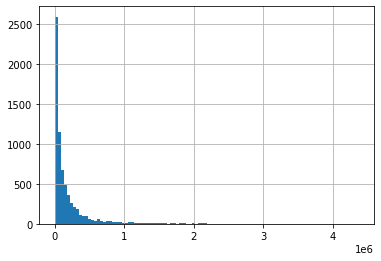

In [9]:
# Let's plot the distibution of the target
data['sales'].hist(bins=100)

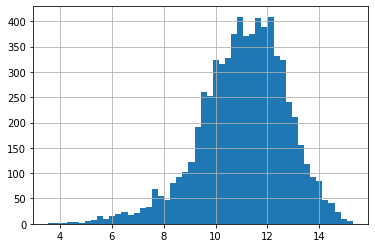

In [10]:
# What transformation function could we apply to the target to improve the prediction?
# Replace the 'transformation_function(x)' by the mathematical function you think is the most appropriate

# If we apply a logarithm function on sales we obtain a gaussian-like distribution which is exactly what we wanted
# The values are more balanced with the logarithm
data['sales'].apply(lambda x: np.log(x)).hist(bins=50)

## 1.4 Dataset train - test split 

### 1.4.1 Sort values per date and remove 2020

In [11]:
# Print the number of movies per year
# This method gives you the number of line for each value of the column "year"
data.year.value_counts()

# The method .hist() is useful as well, as it gives you an histogram (uncomment the line below to see the result)
#data.year.hist()

2016    404
2018    393
2014    383
2017    379
2013    365
2015    362
2019    359
2009    349
2012    349
2010    341
2011    340
2006    328
2005    325
2008    323
2003    314
2007    313
2004    298
2001    293
2002    254
2000    238
2020    154
Name: year, dtype: int64

In [12]:
# Remove 2020 from the dataframe - as it is a weird year
data = data.query("year != 2020")

In [13]:
# Let's sort values by ascending release date to prevent data leakage
# Hint: check the specific function from pandas to do that 
# (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
data = data.sort_values(by='release_date')

In [14]:
# Cast the release_date column to date type
# We do this to prepare a train-test split according to dates
data.release_date = pd.to_datetime(data.release_date)
data.release_date.tail(5)

index
41    2019-12-25
50    2019-12-25
74    2019-12-25
153   2019-12-25
205   2019-12-27
Name: release_date, dtype: datetime64[ns]

In [15]:
# Set the index to release_date
data.index = data.release_date

### 1.4.2 Split data into X (features) and y (target)

In [16]:
# We cast the dtype of the target from integer to float as we want to predict a continuous value
y = data.sales
y = y.astype(float)

In [17]:
# Let's drop the columns that you do not want to use as features
# Note that release_date is ignored as it's in index
X = data.drop(columns=['index', 'year', 'sales', 'release_date', 'title'], errors='ignore')

In [18]:
# Here is an overview of what you should get: 
X.head()

,is_part_of_collection,budget,runtime,original_lang_en,original_lang_es,original_lang_fr,original_lang_it,original_lang_ja,original_lang_other,available_lang_de,...,cos_month,nb_movie_collection,rolling_sales_collection,mean_3_popularity,mean_5_popularity,actor_1_sales,actor_2_sales,actor_3_sales,mean_sales_actor,max_sales_actor
release_date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0,25000000.0,120.0,0,0,1,0,0,0,0,...,1.732051,0.0,0.0,0.489158,0.373572,0.0,0.0,0.0,0.0,0.0
2000-01-05,0,25000000.0,77.0,0,1,0,0,0,0,0,...,1.732051,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2000-01-05,0,25000000.0,116.0,1,0,0,0,0,0,0,...,1.732051,0.0,0.0,0.465217,0.346425,0.0,0.0,0.0,0.0,0.0
2000-01-05,0,22000000.0,142.0,1,0,0,0,0,0,0,...,1.732051,0.0,0.0,1.404085,1.229533,0.0,0.0,0.0,0.0,0.0
2000-01-12,0,9000000.0,165.0,0,0,0,1,0,0,0,...,1.732051,0.0,0.0,1.238290,0.907984,0.0,0.0,0.0,0.0,0.0


### 1.4.3 Train/Test split with sklearn

In [19]:
# There are several ways to train test split. One is to take around 20% of your data as test test.
# Find the appropriate function from scikit-learn to do that

# To prevent the function from shuffling the dataset, we need to change the value of a default parameter. Which one?
# It would introduce some data leakage due to the time series nature of the data if we do not use it.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [20]:
# Print the end of training period
print(f"End of training period: {X_train.index.max()}")

End of training period: 2016-06-22 00:00:00


### 1.4.4 Train/Test split custom

In [21]:
# Another way of splitting data is by arbitrarly choosing a time period for test. 
# Let's say we take 2018 and 2019 as test period
# Complete the following function:

def train_test_split_by_date(df: pd.DataFrame, split_date: str):
    """Split dataset according to a split date in format "YYYY-MM-DD"
    - train: [:split_date[
    - test: [split_date:]
    """
    train = df.loc[:split_date].copy()
    test = df.loc[split_date:].copy()
    return train, test

In [22]:
X_train_bis, X_test_bis = train_test_split_by_date(X, '2018-01-01')
y_train_bis, y_test_bis = train_test_split_by_date(y, '2018-01-01')

### 1.4.5 Apply logarithm function on the target

In [23]:
# Apply the transformation function to y_train
# Hint: replace 'transformation_function()' by the appropriate function
y_train = y_train.apply(lambda x: np.log(x))

# 2. Modelisation

## 2.1 Linear regression

In [24]:
# Initialize a scikit-learn model to make a linear regression. 
from sklearn.linear_model import LinearRegression
# Train the model using X_train, y_train 
lr = LinearRegression().fit(X_train, y_train)
# Predict on the X_test dataset
yhat_lr = lr.predict(X_test)

In [25]:
yhat_lr[:10]

array([10.40507719, 11.37630992, 10.98194175, 10.32275553, 10.84870825,
       11.42529865, 12.13471101, 13.45018222, 11.9928612 , 10.87141953])

## 2.2 To go further: Try other models!

In [26]:
# Let's try another model: Random Forest using scikit-learn library
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1, n_estimators=50).fit(X_train, y_train)
yhat_rf = rf.predict(X_test)

In [27]:
yhat_rf[:10]

array([10.02672725, 11.58203763, 11.20818238, 10.51550381, 11.10734669,
       11.83379409, 11.86413006, 13.35444267, 13.50349133, 10.84726441])

In [30]:
# Let's try another model: LightGBM using lightgbm library
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor().fit(X_train, y_train)
yhat_lgbm = lgbm.predict(X_test)

In [31]:
yhat_lgbm[:10]

array([10.04518164, 11.26062257, 10.72711344, 10.97219777, 10.7624942 ,
       11.78246474, 12.18652426, 13.13356175, 13.23320171, 10.50275124])

# 3. Evaluation

Now we want to evaluate the performance of the model, by comparing it to the truth.
To do so, we are going to make a dataset with the predicted value y_hat, and the truth y

In [32]:
# First, we need to transform again the Y as we did a transformation. 
# To do so, what tranformation function shoud we use? Exponential function
# Hint: replace 'transformation_function()' by the appropriate mathematical function

yhat_lr = [np.exp(x) for x in yhat_lr]
yhat_rf = [np.exp(x) for x in yhat_rf]
yhat_lgbm = [np.exp(x) for x in yhat_lgbm]

## 3.1 Mean Absolute Error (MAE)

MAE is the arithmetic average of the absolute errors.

<img src="https://i.imgur.com/BmBC8VW.jpg" alt="MAE" style="width: 500px;"/>

[Source](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

In [33]:
# Let's create a validation DataFrame 
validation_df = pd.DataFrame(y_test).rename(columns={'sales': 'y'})
validation_df['yhat'] = yhat_rf
validation_df.head()

,y,yhat
release_date,,
2016-06-22,39325.0,22623.110519
2016-06-22,12292.0,107155.639825
2016-06-22,92025.0,73731.277929
2016-06-22,48913.0,36882.918380
2016-06-22,7910.0,66659.089367


In [ ]:
# Exercise: Try to calculate the MAE by implementing the formula above, using validation_df, 
# without using any external library such as scikit-learn

In [34]:
# First, we compute the error (i.e. the difference between y and yhat) and store the results into a new column
# named 'error'
validation_df['error'] = validation_df['y'] - validation_df['yhat']
validation_df.head()

,y,yhat,error
release_date,,,
2016-06-22,39325.0,22623.110519,16701.889481
2016-06-22,12292.0,107155.639825,-94863.639825
2016-06-22,92025.0,73731.277929,18293.722071
2016-06-22,48913.0,36882.918380,12030.081620
2016-06-22,7910.0,66659.089367,-58749.089367


In [35]:
# Then we compute the absolute error (i.e. we apply the abs function on the column error) and store the results into
# a new column named 'abs_error'
validation_df['abs_error'] = validation_df['error'].apply(abs)
validation_df.head()

,y,yhat,error,abs_error
release_date,,,,
2016-06-22,39325.0,22623.110519,16701.889481,16701.889481
2016-06-22,12292.0,107155.639825,-94863.639825,94863.639825
2016-06-22,92025.0,73731.277929,18293.722071,18293.722071
2016-06-22,48913.0,36882.918380,12030.081620,12030.081620
2016-06-22,7910.0,66659.089367,-58749.089367,58749.089367


In [36]:
# Finally we compute the MAE by making the ratio between the sum of the absolute errors and the number of 
# observations (i.e. the length of the dataset)
mae = validation_df.abs_error.sum()/len(validation_df)

In [37]:
# Print the MAE
print(f"MAE = {mae}")

MAE = 106741.77090281564


In [38]:
# Now do the same with the scikit-learn function: 
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, yhat_rf))

106741.77090281564


## 3.2 Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

<img src="https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG" alt="MAE" style="width: 300px;"/>

<img src="https://i1.wp.com/www.skampakis.com/wp-content/uploads/2018/04/root_mean_squared_error_formula.gif" alt="RMSE"/>

source: freecodecamp.org

In [39]:
# Optional: Find the scikit-learn function that computes the MSE and RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, yhat_lr)
rmse = mean_squared_error(y_test, yhat_lr, squared=False)
print(f"MSE = {mse}\nRMSE = {rmse}")

MSE = 1900105445823.0056
RMSE = 1378443.123898482


## 3.3 Mean Absolute Percentage Error (MAPE)

<img src="https://i.imgur.com/YYMpqUY.jpg" alt="MAE" style="width: 500px;"/>

[Source](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

In [40]:
# Exercise: find a function on the internet that computes the MAPE or implement it
def mean_absolute_percentage_error(y_true, y_pred):
    """in percent"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [41]:
mape = mean_absolute_percentage_error(y_test, yhat_lr)
print(f"MAPE = {round(mape)}%")

MAPE = 395.0%


## 3.4 Evaluation metrics wrap-up

Let's wrap all the metrics in a single function.
hints: the function inputs are y_test and y_pred
It must returns something like this:
```
{
    'MAPE': 469.75,
    'MSE': 2128429411885.27,
    'RMSE': 1458913.78,
    'MAE': 191188.52,
}
```

In [42]:
# Implement the function below to have a similar output as described above

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics._regression import _check_reg_targets


def get_evaluation_metrics(y_test, y_pred, y_train=None) -> dict:
    metrics = {
        'mape': mean_absolute_percentage_error(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred, squared=True),
        'rmse': mean_squared_error(y_test, y_pred, squared=False),
        'mae': mean_absolute_error(y_test, y_pred),
    }
    return metrics

# I create a function to make the output of the previous function nicer

def prettify_metrics(metrics: dict) -> str:
    output = [f"Evaluation:\n{'-'*10}"]
    for name, metric in metrics.items():
        output.append((f'- {name.upper()}: {round(metric, 2)}'))
    return '\n'.join(output)

In [43]:
metrics = get_evaluation_metrics(y_test, yhat_lr)
print(prettify_metrics(metrics))

Evaluation:
----------
- MAPE: 395.01
- MSE: 1900105445823.01
- RMSE: 1378443.12
- MAE: 183812.47


In the following courses you will learn **cross-validation** methods, such as [K-fold](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) in order to get a better sense of how good your ML model will be with new data and avoid over-fitting

In [44]:
# Let's compare the performance with the previous model. 
# lightGBM
print(prettify_metrics(get_evaluation_metrics(y_test, yhat_lgbm)))

Evaluation:
----------
- MAPE: 340.52
- MSE: 53760467730.68
- RMSE: 231863.04
- MAE: 105661.02


In [45]:
# Let's take a look at Random forest performances
print(prettify_metrics(get_evaluation_metrics(y_test, yhat_rf)))

Evaluation:
----------
- MAPE: 404.03
- MSE: 52491856711.31
- RMSE: 229111.01
- MAE: 106741.77


In the next lesson, you will learn to [fine-tune hyper-parameters](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html) in order to get even better performance!

In [48]:
# Bonus: let's see how to plot the results to troubleshoot problems!
# If you do not have the 'plotly' library installed: uncomment the line below and run the cell (it will install
# plotly)
#!pip install plotly

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [49]:
df_validation = pd.DataFrame(y_test)
df_validation['yhat'] = yhat_rf
df_validation = df_validation.rename(columns={"sales": 'y'})

import plotly.express as px
import plotly.graph_objects as go

def plot_truth_vs_actual(validation_df: pd.DataFrame):
    fig = go.Figure(data=go.Scatter(
        x=validation_df.y, y=validation_df.yhat,
        mode="markers",
        name='values',
        marker=dict(color="#00828c", opacity=0.2),
    ))
    fig.add_trace(go.Scatter(x=validation_df.y, y=validation_df.y, name='optimal'))
    fig.update_layout(
        xaxis_title="Truth",
        yaxis_title="Forecast"
    )
    return fig

plot_truth_vs_actual(df_validation)

# 4. [OPTIONAL] Model interpretability

In real life, clients are often more interested in model transparency rather than accuracy. For these reason, explanable models are prefered over complex black-box models such as Deep Learning architectures or ensembling methods. However some tools are also available to bring interpretabibily in complex models.

The main thing we want to know is the **feature importance**, that is to say how each feature contributed to the prediction. 

## 4.1 Turn Linear regression coefficients into feature importance

Let's take the linear regression we created earlier.

```
y = β0 + β1 X1 + β2 X2 + … + βP XP
```

The value of each coefficient can help us to get the feature importance. To do so, the data needs to be normalized first.

[source](https://sefiks.com/2019/12/20/a-gentle-introduction-to-feature-importance-in-machine-learning/)

In [70]:
# We store each feature with its associated coefficient into a new DataFrame named features
features = pd.DataFrame(lr.coef_, index=X_train.columns ,columns=['coefficient'])
features.head()

,coefficient
is_part_of_collection,8.759244e-01
budget,1.112758e-08
runtime,2.963153e-03
original_lang_en,3.754106e-01
original_lang_es,2.199053e-01


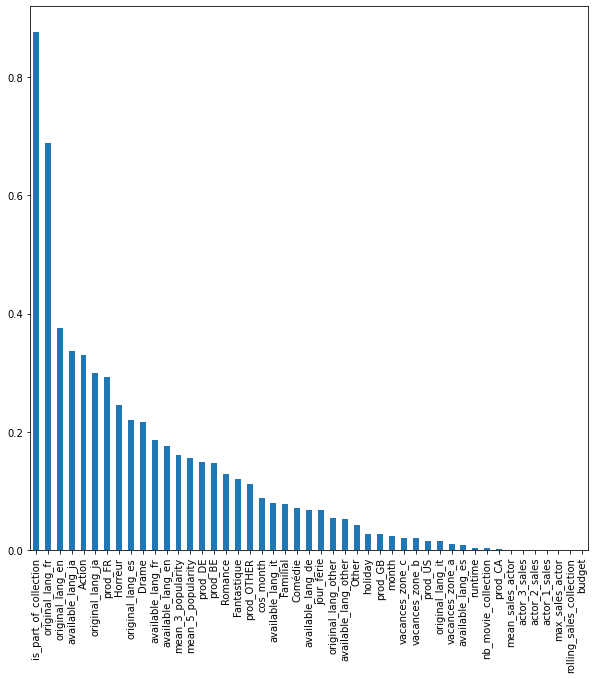

In [71]:
# We plot the coefficients per features in a sorted way to easily see what are the most important ones
features.coefficient.sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

# Here we observe that the feature 'is_part_of_collection' is the most important, followed by languages features
# and the feature about Action movies. But the coefficients here are not normalized, they are linked to the values
# of their associated feature

In [52]:
# We first take the absolute values of the coefficient
features.coefficient = features.coefficient.abs()

In [53]:
# We are going to use standard deviation to normalize value, in order to make values comparable.
stdevs = []
for i in X_train.columns:
    stdev = X_train[i].std()
    stdevs.append(stdev)
    
features["stdev"] = np.array(stdevs).reshape(-1,1)
# We create a new column named 'importance' that is the normalized value of the coefficient (i.e. the value of the
# coefficient multiplied by the standard deviation of each feature computed on the training dataset)
features["importance"] = features["coefficient"] * features["stdev"]

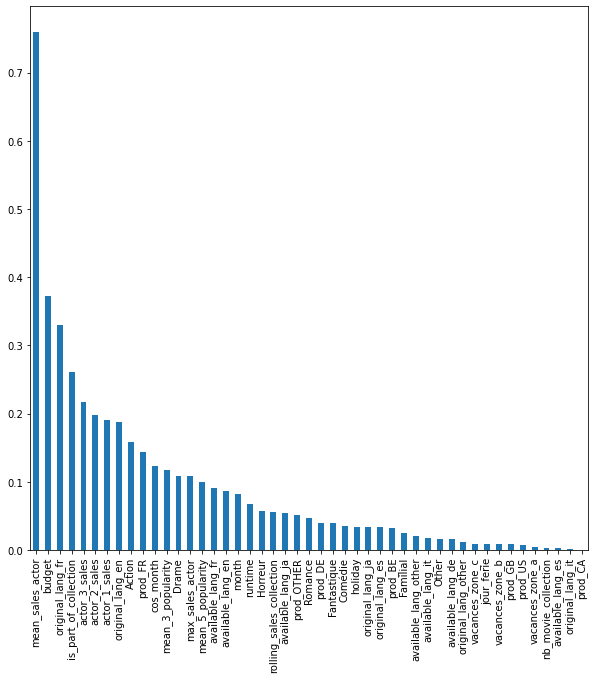

In [54]:
# We plot the normalized features importance
features.importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

# We noticed that the order has been modified and the resulting most important features are more logic: the budget
# and the actors come in top position.

## 4.2 Turn LightGBM coefficients into feature importance

In [55]:
# For LightGBM model, we can extract the feature importances directly from the model itself by calling:
# lgbm.feature_importances. They are already normalized and can be explored and interpreted directly

# We will store the results in a new dataframe named lgbm_feature_imp
lgbm_feature_imp = pd.DataFrame(lgbm.feature_importances_, X_train.columns, columns=['importance'])

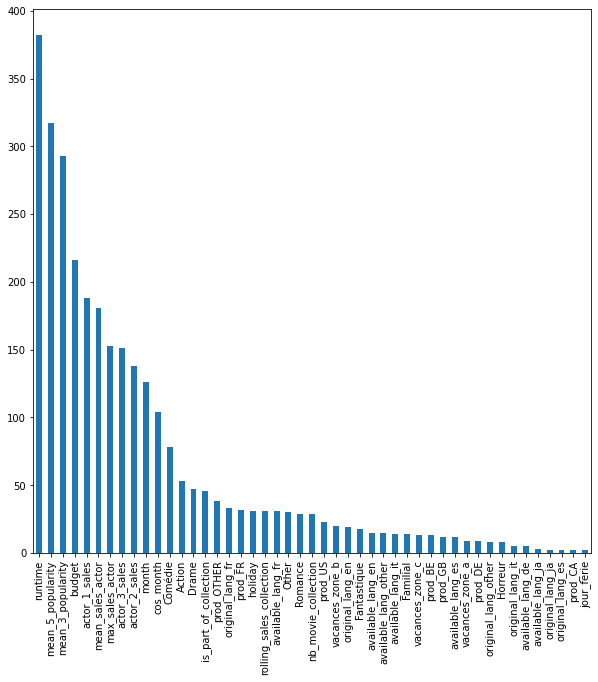

In [56]:
# We plot the results
lgbm_feature_imp.importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

# We can see that for LightGBM the most important features are: the runtime, the popularity of the main actors and
# the budget which is quite intuitive and quite similar to Linear regression results

#### The main inconvenient of these plots is that we can not interpret the real relation between the features and the model, we only know that the top features have a higher impact but no information if it's a positive or a negative impact. To know more, let's use SHAP values

## 4.3 Model interpretability using SHAP values

In [59]:
import shap

In [60]:
# Explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(lgbm)

In [61]:
shap_values = explainer.shap_values(X)

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).

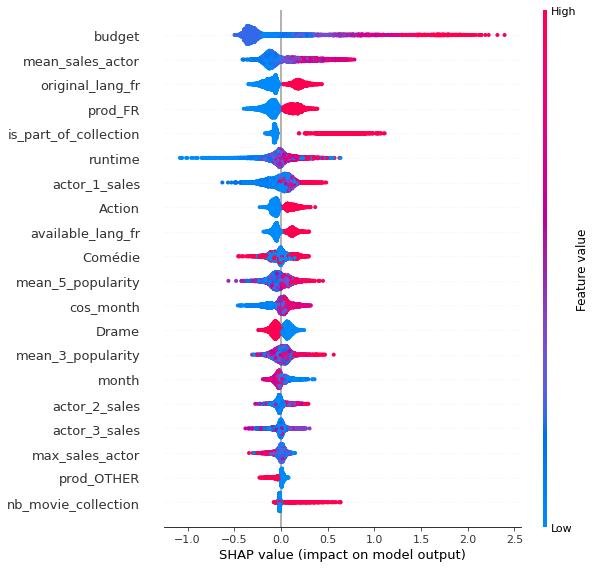

In [63]:
# Exercise: interpret the following graph
shap.summary_plot(shap_values, X)

# We can see that the budget seems to be the most important feature for the model with a positive correlation
# relation (i.e. the bigger the budget, the more tickets the film gets). This interpretation comes from the fact 
# that the shap values for budget is a big line (which means the feature impacts the model a lot) that tends to the
# right in red (positive correlation: a high value for the budget means a high value for the sales)

# We also observe a blue line to the left for runtime which can be interpreted as: short movies (i.e. a low value
# for runtime) will make less sales (because the line tends to the left)

# Also, since we are interested in the french box-office it is interesting to note that some features dedicated to 
# France seems to be quite important: 'original_lang_fr' and 'prod_FR' which is a good sign

# Finally, a lot of actors features related to the actors go up in the graph as being among the most important
# which is quite intuitive: blockbusters have almost always bankable actors in their cast, actors have an impact 
# on a film's revenues 

In [69]:
# Visualize the first prediction's explanation:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# The below explanation shows features each contributing to push the model output from the base value 
# (the average model output over the training dataset we passed) to the model output. Features pushing the 
# prediction higher are shown in red, those pushing the prediction lower are in blue

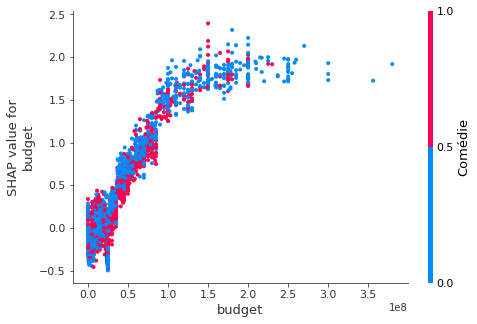

In [65]:
# Create a dependence plot to show the effect of a single feature across the whole dataset 
shap.dependence_plot("budget", shap_values, X)